In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt  

In [67]:
"""
In this part of the exercise, you will build a logistic regression model to predict whether 
a student gets admitted into a university.Suppose that you are the administrator of a
university department and you want to determine each applicant’s chance of admission based on 
their results on two exams. You have historical data from previous applicants that you can use
as a training set for logistic regression. For each training example, you have the applicant’s
scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of 
admission based the scores from those two exams.
"""
#loading data
data=np.loadtxt('ex2data1.txt', delimiter=',')

x=data[:,0:2]
y=np.c_[data[:,2]]

#adding a column of biases to the x matrix and initialzing other variables
X=np.c_[np.ones((x.shape[0],1)),x]

m=X.shape[0]#m is the number of training examples in the data
n=X.shape[1]#n is the number of features in the data

iter=1500#initializing number of iterations to achieve gradient descent
alpha=0.01#initializing learning rate for gradient descent
l=1#learning rate
#initializing the weights to zero
theta=np.zeros((n,y.shape[1]))#2x1
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


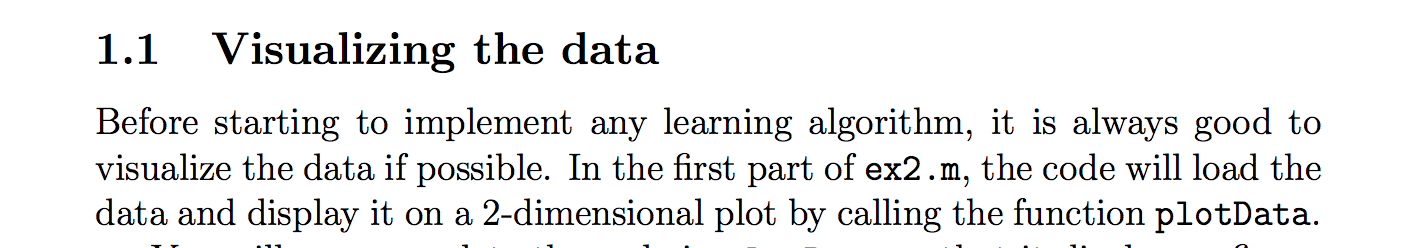

In [68]:
from IPython.display import Image
Image(filename='plot.jpg')

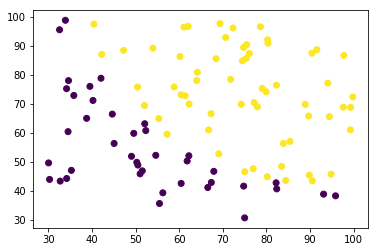

In [69]:
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y)
plt.show()

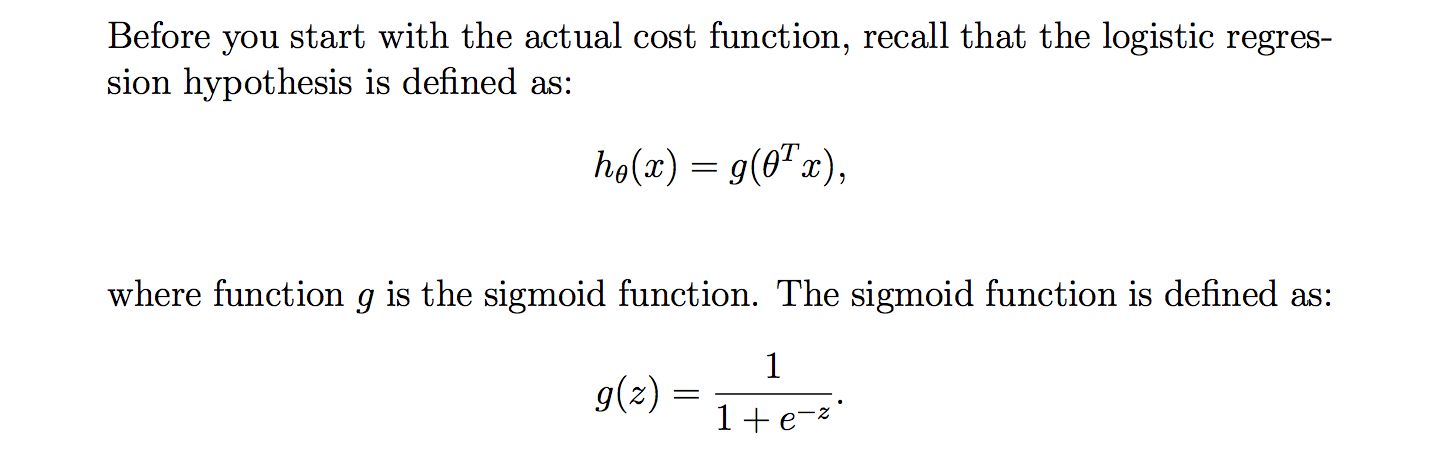

In [70]:
from IPython.display import Image
Image(filename='sigmoid.jpg')

In [71]:
def sigmoid(z):
    """
    The sigmoid function acts as an activation function converting linear values to non 
    linear outputs so that probability can be predicted between 0 and 1
    """
    return 1/(1+np.exp(-z))

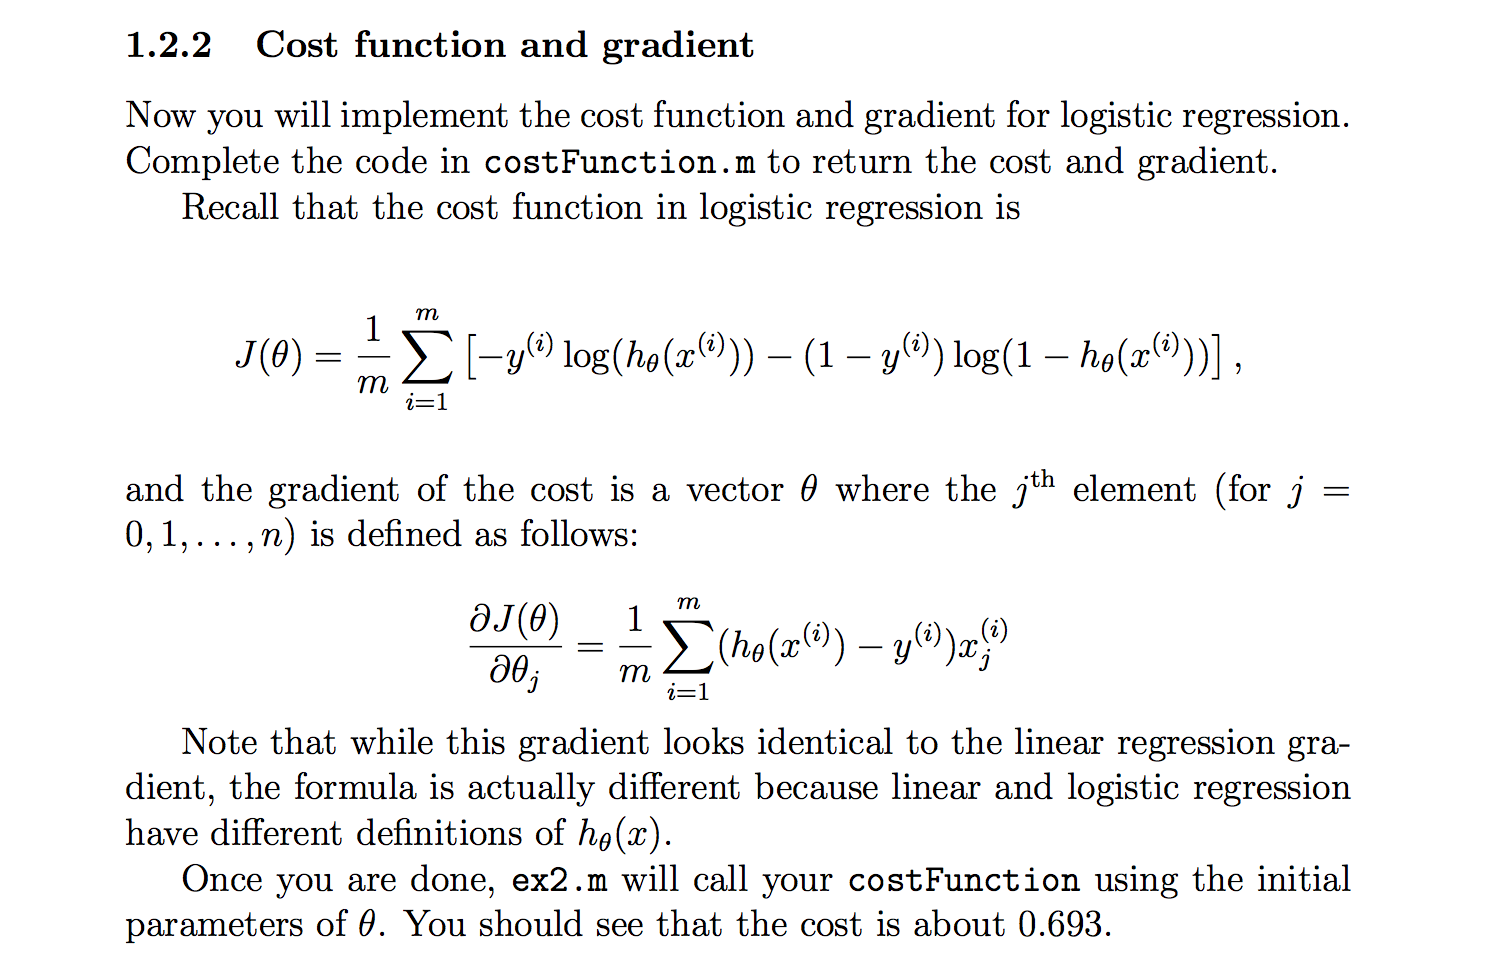

In [72]:
from IPython.display import Image
Image(filename='cost.jpg')

In [73]:
def get_cost(X,y,theta):
    """
    This function calculate the cost function for logistic regression. first, the hypothesis is
    calculated by multiplying the X and theta matrices and passing it through the sigmoid
    activation function. 
    the cost function is the sum of the elemnt wise multiplication of y and the log of the 
    hypothesis and the element wise multiplication of a matrix of ones minus y and the log of 
    one minus the hypothesis. 
    The cost function is then divided by the number of training examples
    """
    hyp = sigmoid(X.dot(theta))
    one=np.ones(y.shape)#initialzing a matrix of ones for matrix subtraction
    J=(-1/m)*np.sum(np.multiply(y,np.log(hyp))+np.multiply((one-y),np.log(one-hyp)))
    return J

g=get_cost(X,y,theta)
print("Initial cost is:",g)


Initial cost is: 0.69314718056


In [74]:
def gradient(X,y,theta):
    
    """
    The function computes the gradient descent algorithm that is constantly updating the value of
    theta so that the cost function is minimized.
    """

    for i in range(iter):
        hyp = sigmoid(X.dot(theta));
        """
        the transpose of the X matrix is multiplied by the error matrix.As the product and the theta matrix now have the
        same dimensions, they are subtracted and theta is updated
        """
        theta=theta-(alpha/m)*(X.T.dot(hyp-y))
    return theta
g=gradient(X,y,theta)

print("Weights obtained from gradient descent are:")
print(g)

Weights obtained from gradient descent are:
[[-1.14871686]
 [ 0.56980921]
 [ 0.11139426]]


In [75]:
"""
given a sample X matrix, the prediction of the y value is computed

"""
X=np.array([1,45,85])
hyp=sigmoid(X.dot(t))#predicted value is calculated using weights obtained through gradient descent
print("The predicted value is:",float(hyp))

The predicted value is: 0.9999999999999982


In [79]:
"""
In this part of the exercise, you will implement regularized logistic regression to predict 
whether microchips from a fabrication plant passes quality assurance (QA). During QA, each
microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some
microchips on two different tests. From these two tests, you would like to determine whether 
the microchips should be accepted or rejected. To help you make the decision, you have a 
dataset of test results on past microchips, from which you can build a logistic regression 
model.
"""

#loading data
data=np.loadtxt('ex2data2.txt', delimiter=',')

x=data[:,0:2]
y=np.c_[data[:,2]]

#adding a column of biases to the x matrix and initialzing other variables
X=np.c_[np.ones((x.shape[0],1)),x]

m=X.shape[0]#m is the number of training examples in the data
n=X.shape[1]#n is the number of features in the data

iter=1500#initializing number of iterations to achieve gradient descent
alpha=0.01#initializing learning rate for gradient descent
l=1#learning rate
#initializing the weights to zero
theta=np.zeros((n,y.shape[1]))#2x1

Regualrized cost function is as follows:


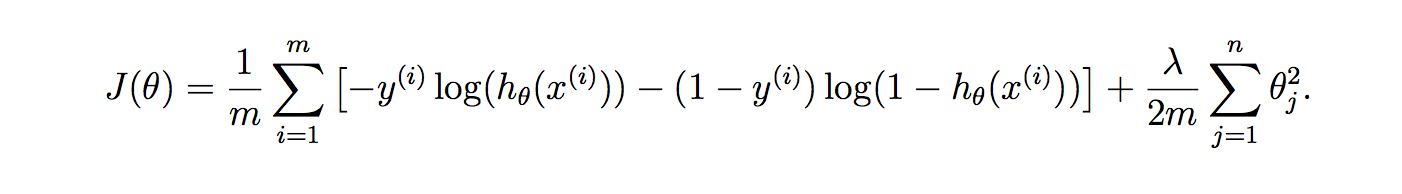

In [82]:
print("Regualrized cost function is as follows:")
from IPython.display import Image
Image(filename='reg.jpg')

In [80]:
theta=np.zeros((n,y.shape[1]))#2x1
def regularized_cost():
    """
    This function computes the regularized cost function. the cost function is obtained from 
    calling the previous function- get_cost and tne regularization terms are added to it
    """
    J=get_cost(X,y,theta)#normal cost function is stored as J
    J=J+(l/2*m)*np.sum(theta[:,1:]**2)#the sum of all theta values except the firest column of biases are squared and summed and divided by lambda divided by 2*m
    return J

j=regularized_cost()
print("Initial cost after regularization is:",j)

Initial cost after regularization is: 0.69314718056


Regualrized gradient descent is as follows:


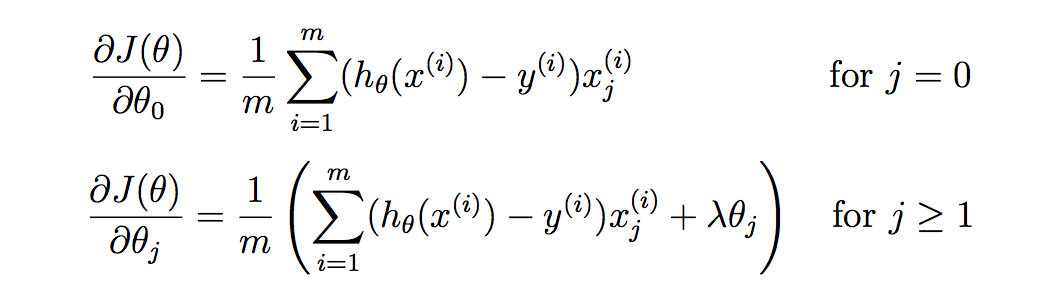

In [88]:
print("Regualrized gradient descent is as follows:")
from IPython.display import Image
Image(filename='gd.jpg')

In [86]:
def regularized_descent(X,y,theta):
    """
    This function calculates the regularized gradent descent. gradient descent is carried out 
    with regularization parameters added to the theta values
    """
    for i in range(iter):
        hyp=sigmoid(X.dot(theta))#hypothesis is computed
        var=theta[0,0]
        var2=X.T.dot(hyp-y)[0,0]
        theta[0,0] = var-(alpha/m)*(var2)#for the first value of theta, in practice regularization parameters are not added
        theta[1:,0]=theta[1:,0]-(alpha/m)*((X.T.dot(hyp-y))[1:,0])-(l/m)*theta[1:,0] # the other values ar eupdated via gradient descent and the regularization term of 1/m*theta is subtracted
    return theta
rd=regularized_descent(X,y,theta)
print("Theta values obtained after regularized gradient descent are")
print(rd)

Theta values obtained after descent are
[[-0.03305776]
 [-0.02015371]
 [ 0.00141637]]


In [91]:
"""
given a sample X matrix, the prediction of the y value is computed

"""
X=np.array([1,-0.25,1.5])
hyp=sigmoid(X.dot(rd))#predicted value is calculated using weights obtained through gradient descent
print("The predicted value is:",float(hyp))

The predicted value is: 0.49352666799929273
